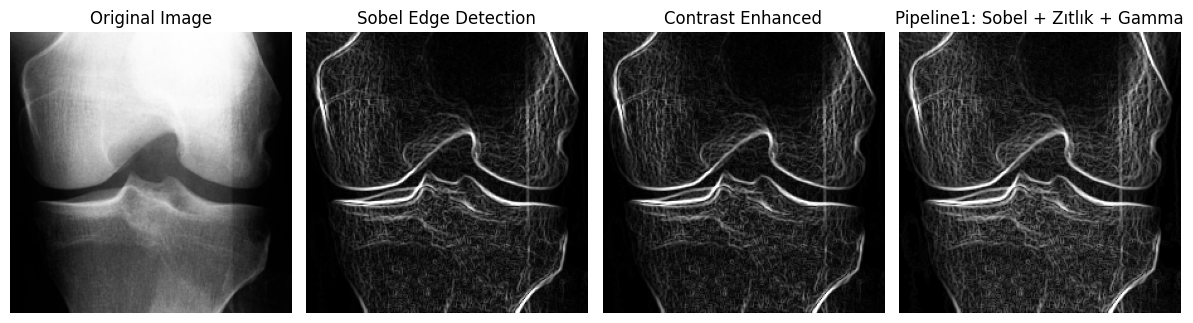

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Sobel Kenar Algılama
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Zıtlık Artırma (Contrast Stretching)
min_val = np.min(sobel_combined)
max_val = np.max(sobel_combined)
contrast_stretched = ((sobel_combined - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Gamma Dönüşümü
def apply_gamma(image, gamma):
    gamma_corrected = np.power(image / 255.0, gamma) * 255
    return gamma_corrected.astype(np.uint8)

gamma_value = 0.8  # Gamma değeri (isteğe göre değiştirilebilir)
gamma_corrected = apply_gamma(contrast_stretched, gamma_value)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 8))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Sobel Kenar Algılama
plt.subplot(1, 4, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Zıtlık Artırma
plt.subplot(1, 4, 3)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Enhanced")
plt.axis('off')

# Gamma Düzeltme
plt.subplot(1, 4, 4)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Pipeline1: Sobel + Zıtlık + Gamma")
plt.axis('off')

plt.tight_layout()
plt.show()


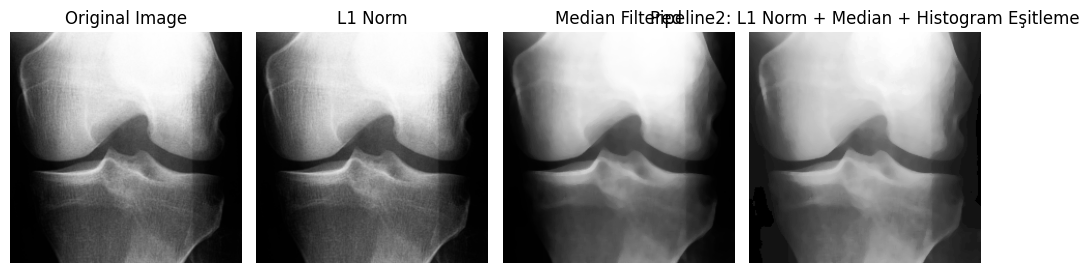

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# L1 Norm (veya başka bir normalizasyon yöntemi, burada örnek olarak L2 normu kullanılıyor)
image_l1norm = np.abs(image)  # L1 norm için negatif değerleri kaldırabiliriz, burada basitçe mutlak değeri aldık

# Median Filtreleme
image_median = cv2.medianBlur(image_l1norm, 5)  # 5x5 kernel boyutu ile median filtreleme

# Histogram Eşitleme
image_hist_eq = cv2.equalizeHist(image_median)

# Sonuçları göster
plt.figure(figsize=(10, 7))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# L1 Norm Uygulanmış Görüntü
plt.subplot(1, 4, 2)
plt.imshow(image_l1norm, cmap='gray')
plt.title("L1 Norm")
plt.axis('off')

# Median Filtreli Görüntü
plt.subplot(1, 4, 3)
plt.imshow(image_median, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')

# Histogram Eşitlenmiş Görüntü
plt.subplot(1, 4, 4)
plt.imshow(image_hist_eq, cmap='gray')
plt.title("Pipeline2: L1 Norm + Median + Histogram Eşitleme")
plt.axis('off')

plt.tight_layout()
plt.show()


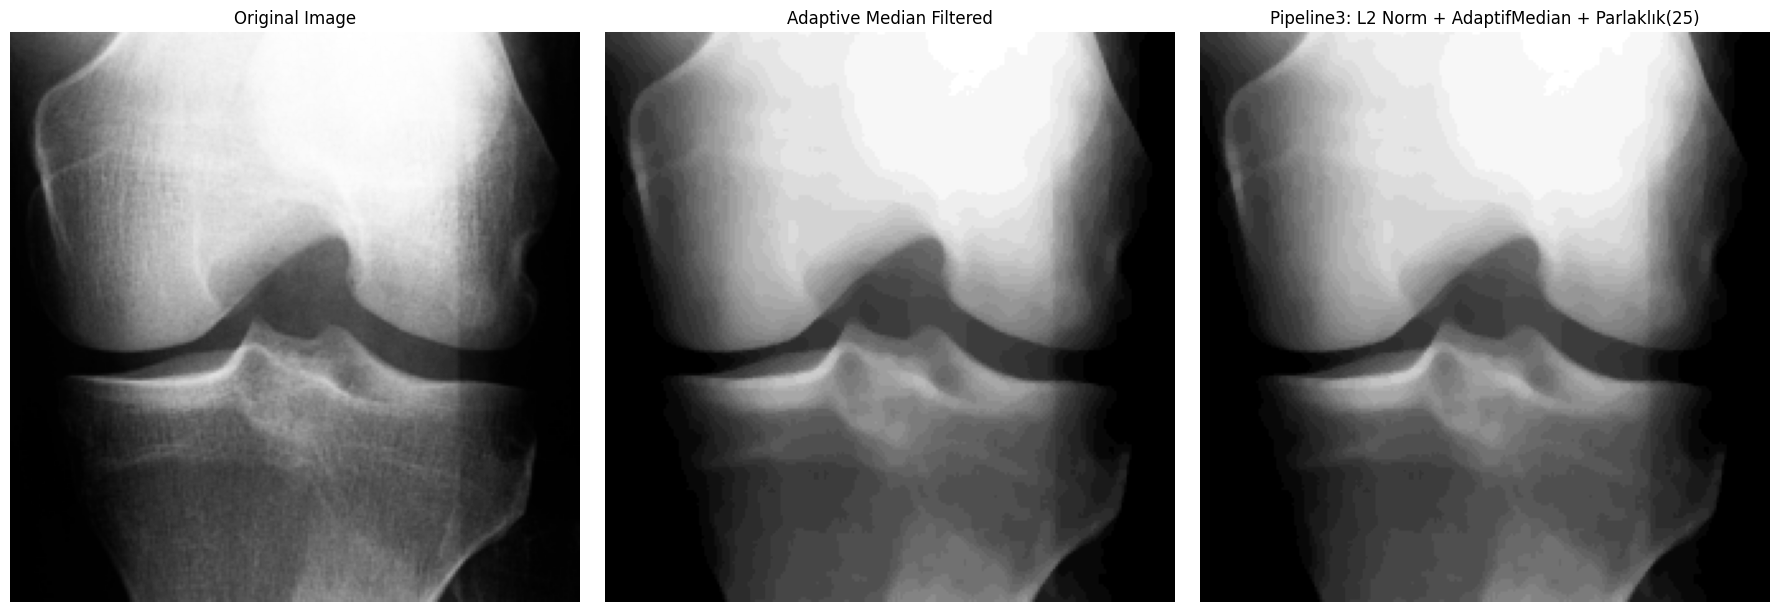

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I2 Norm Normalizasyonu
def i2_norm(image):
    norm = np.sqrt(np.sum(image ** 2))  # I2 normunu hesapla (karelerin toplamının karekökü)
    normalized_image = image / norm if norm > 0 else image  # Normalize edilmiş görüntü
    return (normalized_image * 255).astype(np.uint8)  # [0, 255] aralığına getir

normalized_image = i2_norm(image)

# Adım 2: Adaptif Median Filtreleme
def adaptive_median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, ksize=kernel_size)  # OpenCV'deki medianBlur adaptif olarak çalışabilir

adaptive_median_filtered = adaptive_median_filter(normalized_image, kernel_size=5)

# Adım 3: Parlaklık Artırma
brightness_increase = 25  # Parlaklık artırma miktarı
brightened_image = cv2.add(adaptive_median_filtered, np.full_like(adaptive_median_filtered, brightness_increase))

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Adaptif Median Filtreli Görüntü
plt.subplot(1, 3, 2)
plt.imshow(adaptive_median_filtered, cmap='gray')
plt.title("Adaptive Median Filtered")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 3, 3)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline3: L2 Norm + AdaptifMedian + Parlaklık(25)")
plt.axis('off')

plt.tight_layout()
plt.show()


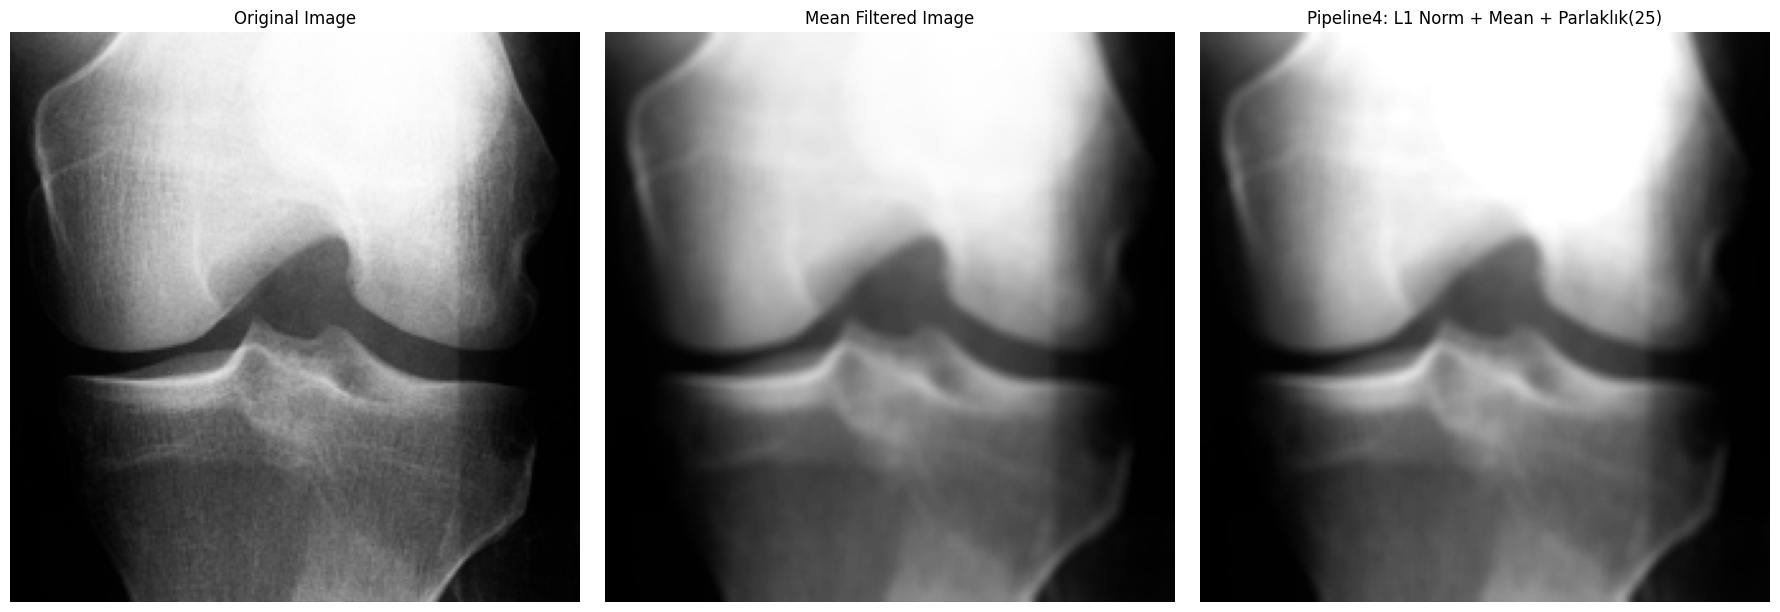

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I1 Norm Normalizasyonu
normalized_image = image / 255.0  # Piksel değerlerini [0, 1] aralığına getir
normalized_image = (normalized_image * 255).astype(np.uint8)  # [0, 255] aralığına geri çevir

# Adım 2: Mean (Ortalama) Filtreleme
def mean_filter(image, kernel_size=1):
    return cv2.blur(image, (kernel_size, kernel_size))  # Ortalama filtre uygula

mean_filtered = mean_filter(normalized_image, kernel_size=5)

# Adım 3: Parlaklık Artırma
brightness_increase = 25  # Parlaklık artırma miktarı
brightened_image = cv2.add(mean_filtered, np.full_like(mean_filtered, brightness_increase))

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Mean Filtreli Görüntü
plt.subplot(1, 3, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 3, 3)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4: L1 Norm + Mean + Parlaklık(25)")
plt.axis('off')

plt.tight_layout()
plt.show()


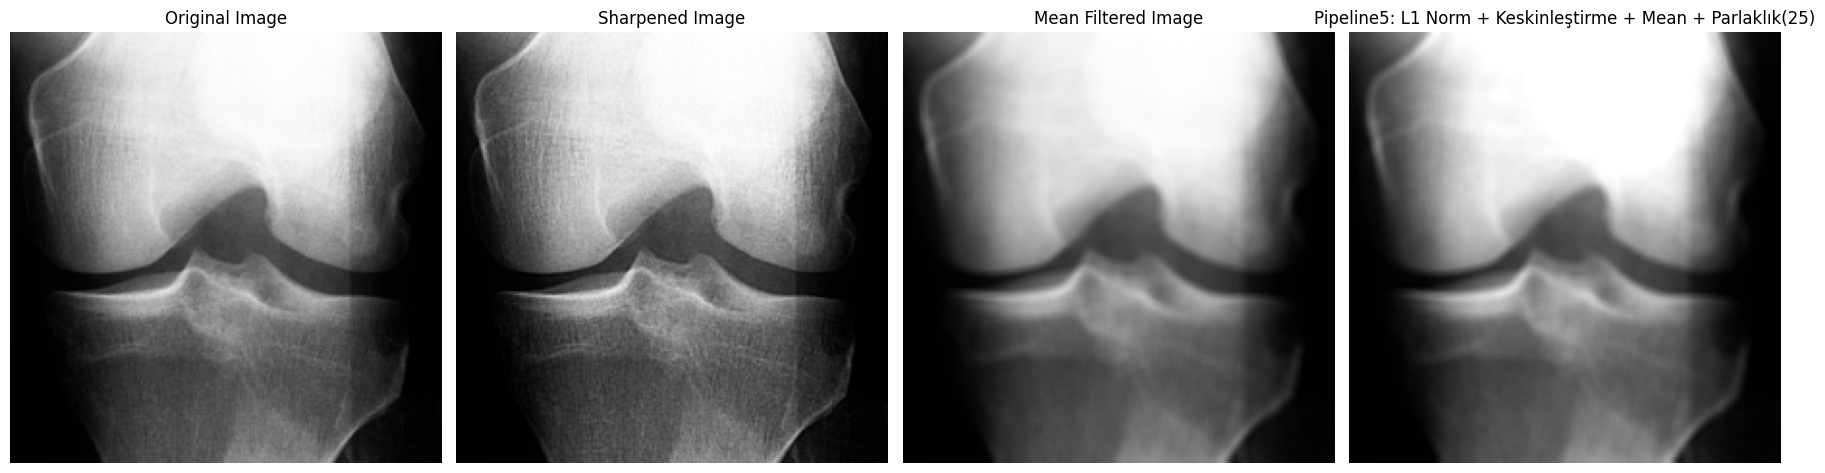

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I1 Norm Normalizasyonu
normalized_image = image / 255.0  # Piksel değerlerini [0, 1] aralığına getir
normalized_image = (normalized_image * 255).astype(np.uint8)  # [0, 255] aralığına geri çevir

# Adım 2: Keskinleştirme (Unsharp Masking)
def sharpen_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 1.5)  # Gaussian blur uygula
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)  # Keskinleştirme işlemi
    return sharpened

sharpened_image = sharpen_image(normalized_image)

# Adım 3: Mean (Ortalama) Filtreleme
def mean_filter(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))  # Ortalama filtre uygula

mean_filtered = mean_filter(sharpened_image, kernel_size=5)

# Adım 4: Parlaklık Artırma
brightness_increase = 25 # Parlaklık artırma miktarı
brightened_image = cv2.add(mean_filtered, np.full_like(mean_filtered, brightness_increase))

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Keskinleştirilmiş Görüntü
plt.subplot(1, 4, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

# Mean Filtreli Görüntü
plt.subplot(1, 4, 3)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 4, 4)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline5: L1 Norm + Keskinleştirme + Mean + Parlaklık(25)")
plt.axis('off')

plt.tight_layout()
plt.show()


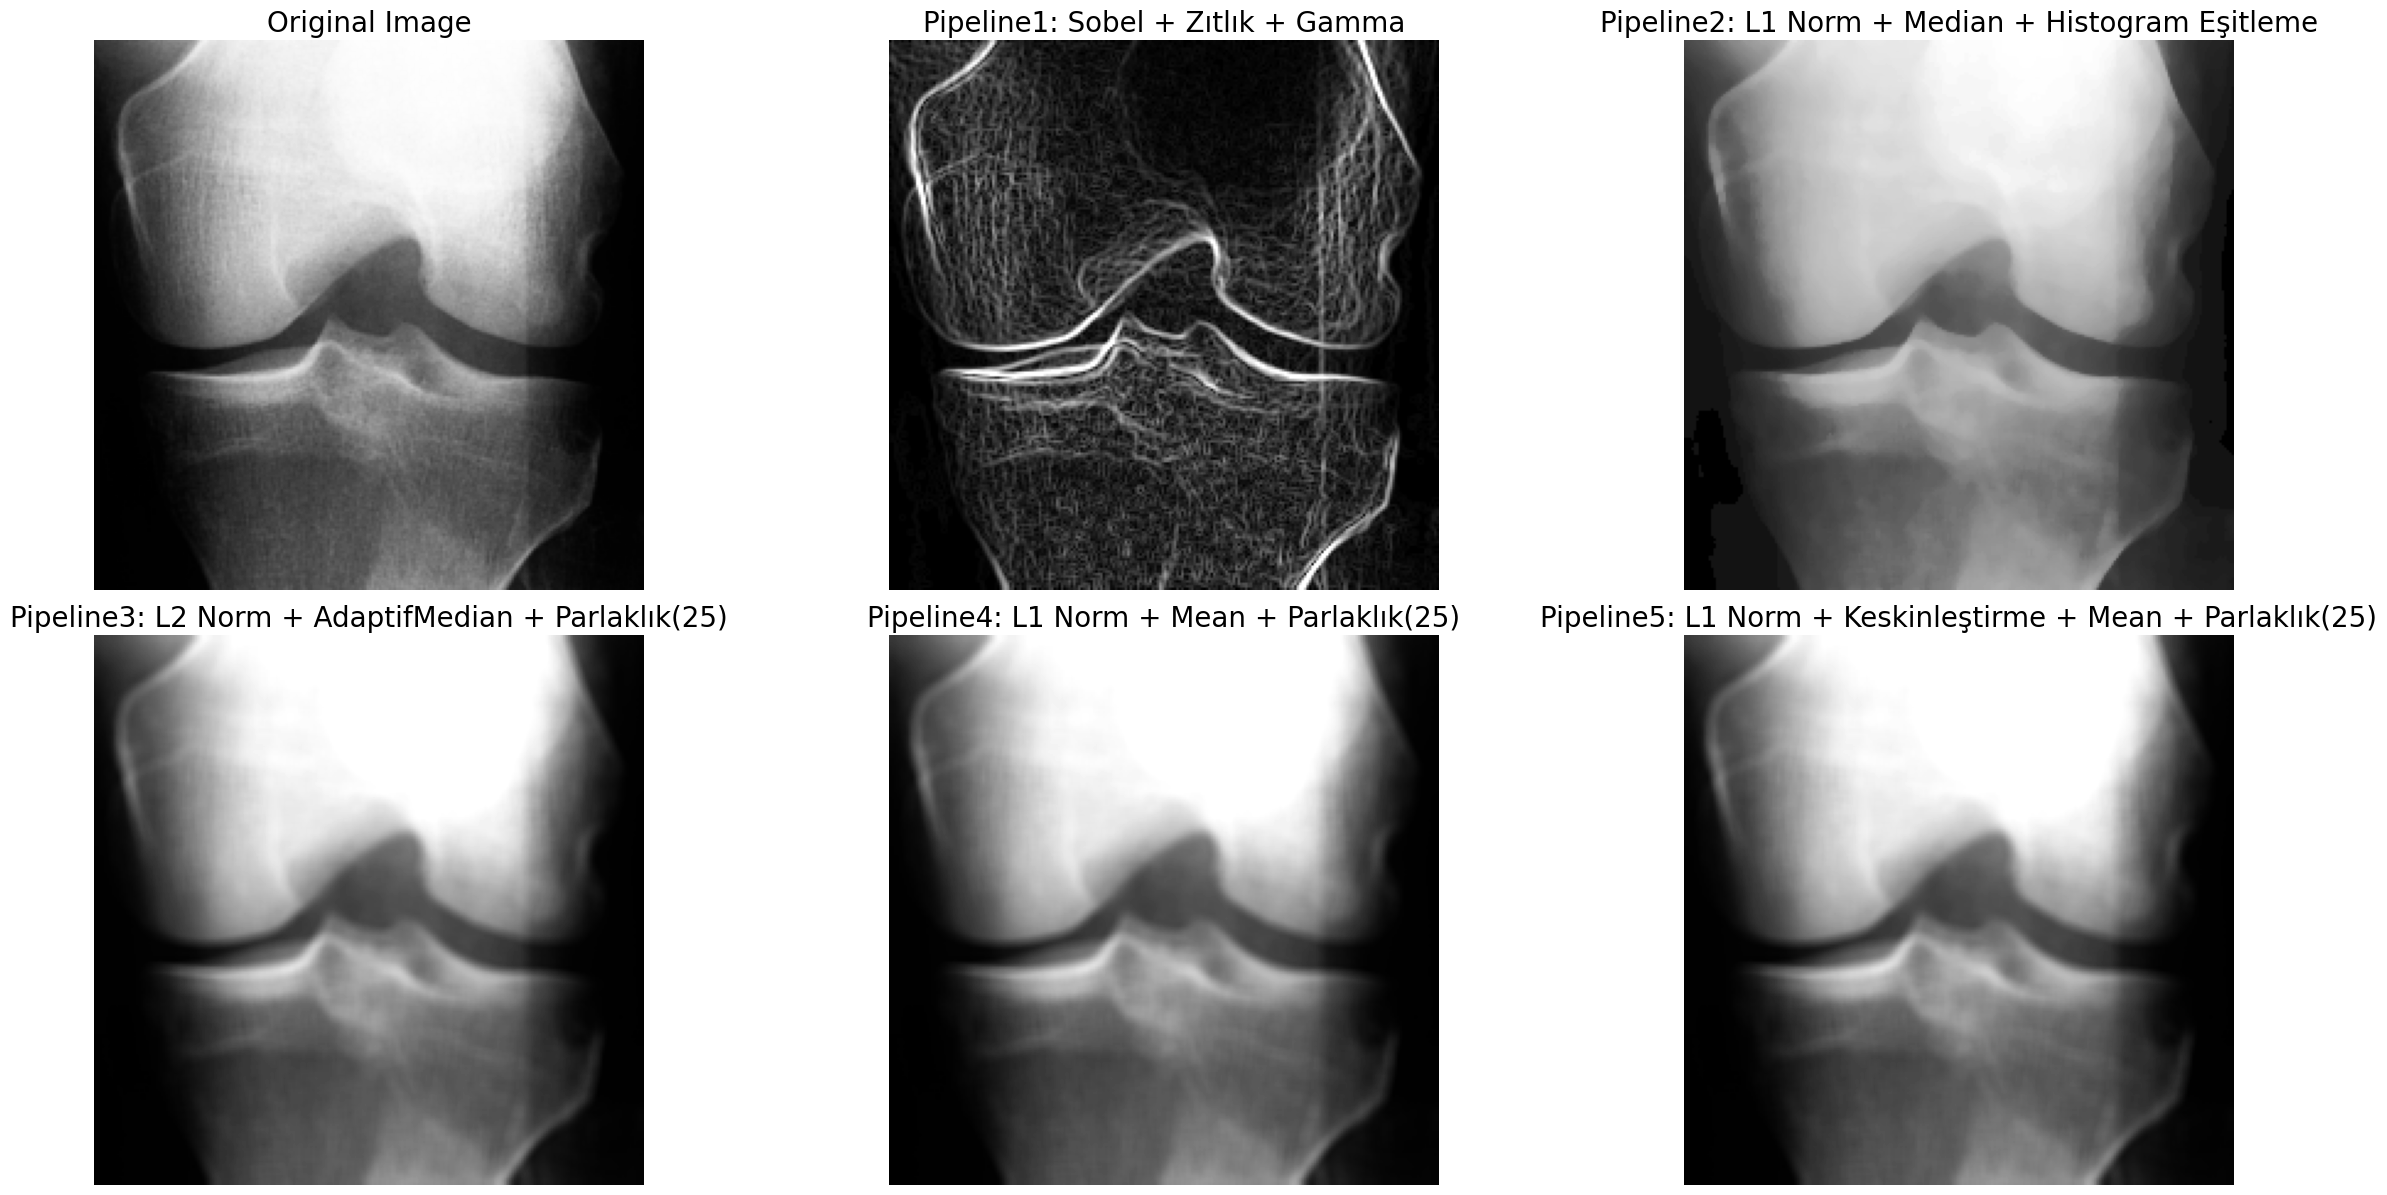

In [35]:
import cv2
import matplotlib.pyplot as plt

# Orijinal görüntü
image_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Sonuçları görselleştirme
plt.figure(figsize=(24, 18))  # Figür boyutunu büyütüyoruz

# Orijinal Görüntü
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image", fontsize=20)  # Daha büyük başlık fontu
plt.axis('off')



# Pipeline1
plt.subplot(3, 3, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Pipeline1: Sobel + Zıtlık + Gamma", fontsize=20)
plt.axis('off')

# Pipeline2
plt.subplot(3, 3, 3)
plt.imshow(image_hist_eq, cmap='gray')
plt.title("Pipeline2: L1 Norm + Median + Histogram Eşitleme", fontsize=20)
plt.axis('off')

# Pipeline3
plt.subplot(3, 3, 4)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline3: L2 Norm + AdaptifMedian + Parlaklık(25)", fontsize=20)
plt.axis('off')

# Pipeline4
plt.subplot(3, 3, 5)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4: L1 Norm + Mean + Parlaklık(25)", fontsize=20)
plt.axis('off')

# Pipeline5
plt.subplot(3, 3, 6)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline5: L1 Norm + Keskinleştirme + Mean + Parlaklık(25)", fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.show()


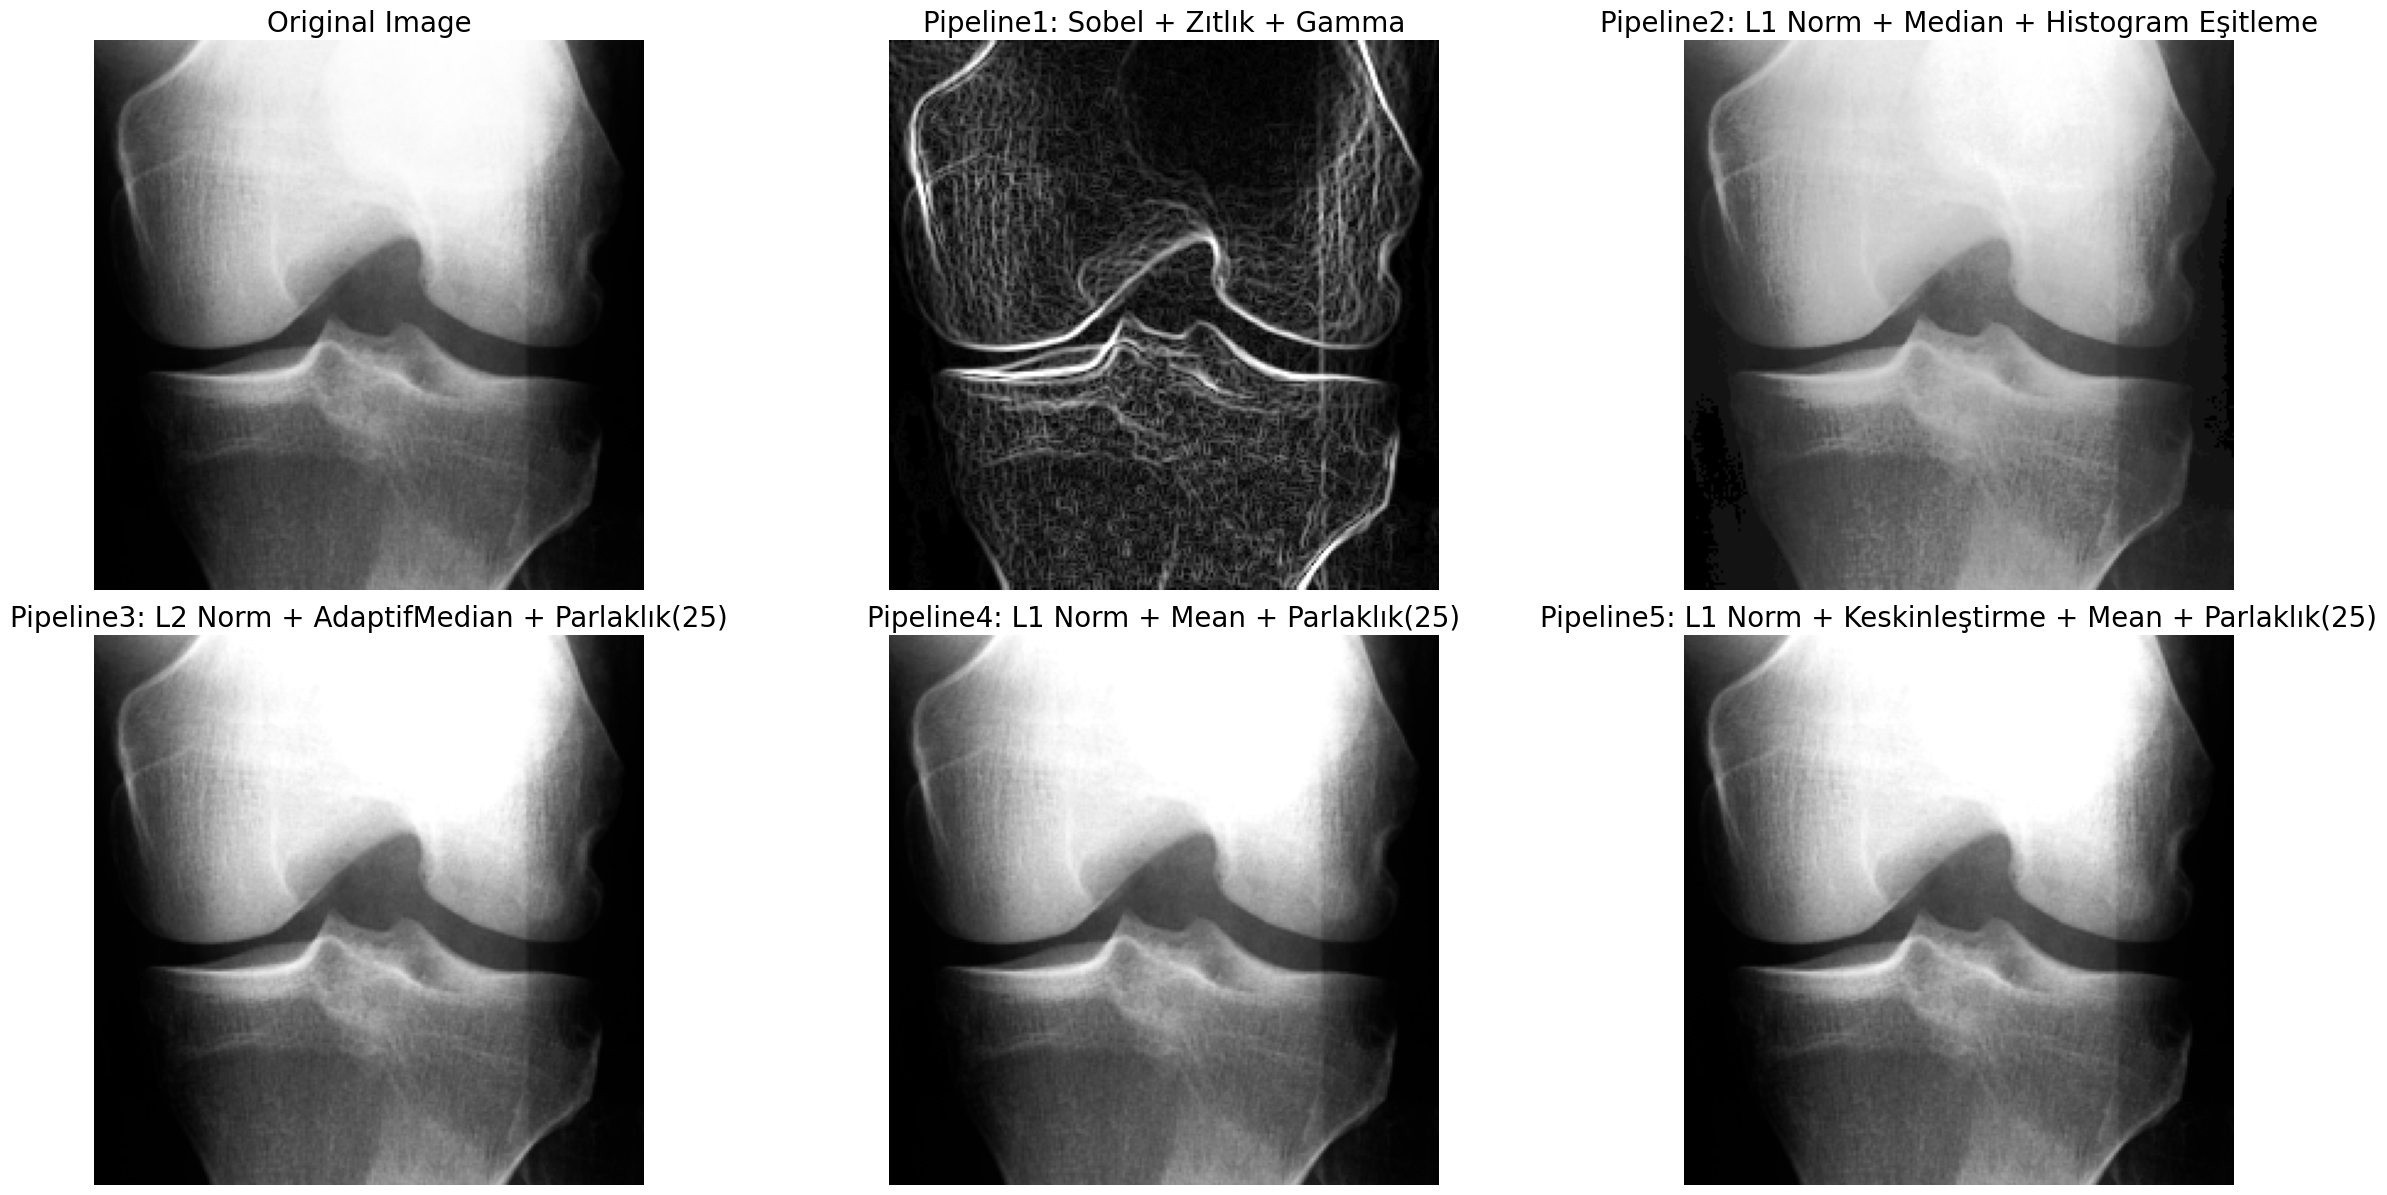

Pipeline1: gamma + sobel + sobel edge: Entropy = 3.6947
Pipeline2: L1 Norm + Median + Histogram Eşitleme: Entropy = 7.2671
Pipeline3: L2 Norm + AdaptifMedian + Parlaklık(25): Entropy = 7.0113
Pipeline4: L1 Norm + Mean + Parlaklık(25): Entropy = 7.0113
Pipeline5: L1 Norm + Keskinleştirme + Mean + Parlaklık(25): Entropy = 7.0113

En İyi Pipeline: Pipeline2: L1 Norm + Median + Histogram Eşitleme
Entropi Değeri: 7.2671


In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Shannon Entropisi Hesaplama Fonksiyonu
def calculate_entropy(image):
    # Histogramı normalize et
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])
    hist = hist / hist.sum()  # Normalize edilmiş histogram
    hist = hist[hist > 0]  # Sıfır olan değerleri çıkart
    entropy = -np.sum(hist * np.log2(hist))  # Entropi formülü
    return entropy

# Orijinal görüntü
image_path = r"C:\Users\omery\Desktop\biyomedikalyenidenegitim\images\image(4).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Örnek pipeline'lar (bunlar kendi pipeline'larınızla değiştirilmelidir)
# Bu örnekler: sobel, histogram eşitleme, parlaklık artırma, vb.
# (Önceki işlemler uygulanmış görüntüler varsayılmaktadır)
brightened_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
image_hist_eq = cv2.equalizeHist(image)
brightened_image = cv2.add(image, 25)  # Parlaklık artırma

# Pipeline'lar için entropi hesaplama
entropies = {
    "Pipeline1: gamma + sobel + sobel edge": calculate_entropy(brightened_sobel),
    "Pipeline2: L1 Norm + Median + Histogram Eşitleme": calculate_entropy(image_hist_eq),
    "Pipeline3: L2 Norm + AdaptifMedian + Parlaklık(25)": calculate_entropy(brightened_image),
    "Pipeline4: L1 Norm + Mean + Parlaklık(25)": calculate_entropy(brightened_image),
    "Pipeline5: L1 Norm + Keskinleştirme + Mean + Parlaklık(25)": calculate_entropy(brightened_image),  # Örnek keskinleştirme uygulanabilir
}



# Sonuçları görselleştirme
plt.figure(figsize=(24, 18))  # Figür boyutunu büyütüyoruz

# Orijinal Görüntü
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image", fontsize=20)  # Daha büyük başlık fontu
plt.axis('off')

# Pipeline1
plt.subplot(3, 3, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Pipeline1: Sobel + Zıtlık + Gamma", fontsize=20)
plt.axis('off')

# Pipeline2
plt.subplot(3, 3, 3)
plt.imshow(image_hist_eq, cmap='gray')
plt.title("Pipeline2: L1 Norm + Median + Histogram Eşitleme", fontsize=20)
plt.axis('off')

# Pipeline3
plt.subplot(3, 3, 4)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline3: L2 Norm + AdaptifMedian + Parlaklık(25)", fontsize=20)
plt.axis('off')

# Pipeline4
plt.subplot(3, 3, 5)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4: L1 Norm + Mean + Parlaklık(25)", fontsize=20)
plt.axis('off')

# Pipeline5
plt.subplot(3, 3, 6)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline5: L1 Norm + Keskinleştirme + Mean + Parlaklık(25)", fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

# Entropi değerlerini yazdırma
for pipeline, entropy in entropies.items():
    print(f"{pipeline}: Entropy = {entropy:.4f}")

# En iyi pipeline'ı bulma (en yüksek entropiye sahip olanı seçme)
best_pipeline = max(entropies, key=entropies.get)
best_entropy = entropies[best_pipeline]

# En iyi pipeline'ı yazdırma
print(f"\nEn İyi Pipeline: {best_pipeline}")
print(f"Entropi Değeri: {best_entropy:.4f}")

(-0.5, 223.5, 223.5, -0.5)

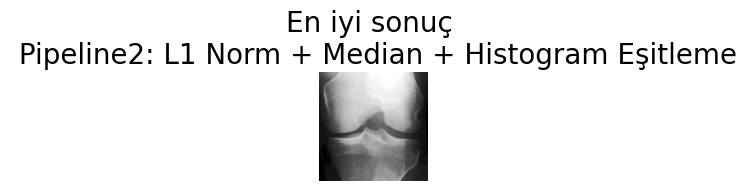

In [37]:
# Pipeline2
plt.subplot(3, 3, 3)
plt.imshow(image_hist_eq, cmap='gray')
plt.title("En iyi sonuç \n Pipeline2: L1 Norm + Median + Histogram Eşitleme", fontsize=20)
plt.axis('off')